Hello, welcome to the part 2 of the notebook where we'll be focusing on the machine learning model.

### Training a ML model pipeline (my approah):

The notebook is a good experiemental environment to try different things out.

There is a general approach to training a machine learning model which I aim to follow and this is my approach for this dataset.

[Part 1 - EDA of the dataset](https://www.kaggle.com/richieone13/1-churn-notebook-eda)
* import the files
* EDA on the dataset
* treat missing data

Part 2 - Machine Learning Model
* selectively choose the features that want to include (select minimum features and scale horizontally - based on Exploratory Data Analysis (EDA)) this will help with overfitting and peformance in training the model)
* OPTIONAL - remove the outliers if there are any so the model outliers does not skew the model - maybe using 3 standard deviation, data that is < 1%, data that is > 99%
* OPTIONAL - shuffling the data to avoid skewness
* import one hot encoder
* OPTIONAL - scaling from 0 to 1 (not required rescaling as only concern of the output whether churn or not in the previous month)
* measure the result via a confusion matrix
* experiement with different models

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
#Removing missing values 
df.dropna(inplace = True)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [30]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [41]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  

In [43]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
preds = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, preds))
print(confusion_matrix(y_test,preds))  

0.7874911158493249
[[916 117]
 [182 192]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
preds = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, preds))
print(confusion_matrix(y_test,preds))  

0.7853589196872779
[[940  93]
 [209 165]]


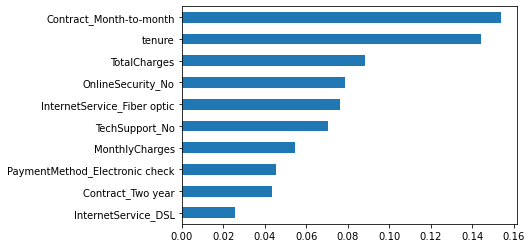

In [45]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [46]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
print (metrics.accuracy_score(y_test, preds))
print(confusion_matrix(y_test,preds))  

0.7938877043354655
[[917 116]
 [174 200]]


In [47]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print (metrics.accuracy_score(y_test, preds))
print(confusion_matrix(y_test,preds))

0.7704335465529495
[[897 136]
 [187 187]]


### Tuning the model right for the business?! You can't have it both ways..

A way to measure performance in a model is not just 1 value to predict it's accuracy, but also the precission and recall rate which can be used to tune the model to meet the business objectives

Tuning the model? What does this mean? Before we go there let's think about the possible outcome of the predictions. 

When the model predicts the customer has churn correctly, it is called **true positive** and when it predicts the customer has churn incorrectly it is called **false positive**. Similarly when the model predicts will not churn correctly is called **true negative** and incorrectly predicting customers that will not churn as churned this is called **false negative.** 

note: note true means the model predicted correctly and false means the model predicted incorrectly.

Not let's have a think here....

As a business you don't want to think the customer will not churn and be totatlly wrong! This means false neagtives!

You think the customer won't leave you in the circumstances so you won't be providing them with any offers. Instead you rather have predict the customer may leave next month be wrong in fact they will be staying with you (false positive). But you'll be providing an offers/discount anyway incase you are wrong and they do leave. In data science term and this desired situation is called **high recall.**


The business wants to focus more on retaining customers and rather provide offers to the ones that they think will churn next month in order to retain them (i.e. end of mobile contract, it is very likely the customer may look to a new provider for a better deal). The business rather pay a small fee to captivate the customer to staying than losing 18-36 months of the mobile contract.


However a special case is if the business considers a re-engagement email campaign which says something like “We noticed you may be leaving us. Please don’t!”. You are more focus on reducing the number of predictions the customer has churn incorrectly (false positives). In other words, you would want to minimise the number of happy users who see this email, and instead have this email almost exclusively hit users in danger of churning. This situtation desire in the model is **high precison.**

There is a trade off for precision and recall, you can't have 100% accuracy rate so you would have to compromised between the two.

TL;TR

It is important what the business strategy is to reduce churn rate, are they going to provide offers to majority of their customers when their contract ends, or would you rather not provide offers to that many customers as they will be staying anyway so you can provide more savings from the offers. This ask the question what would they rather do in the two circumstances. 

This decision determines how the model is tune to yield results better for the business - **recision or recall or both equally important?**

Reference:

[Tuning Precision & Recall To Minimize Churn](https://www.vidora.com/ml-in-business/reducing-user-churn-with-machine-learning-precision-and-recall/#:~:text=What%20are%20%E2%80%9Cprecision%E2%80%9D%20and%20%E2%80%9C,the%20churn%20prediction%20algorithm%20is.)

[Quora: When is precision more important over recall](https://www.quora.com/When-is-precision-more-important-over-recall)